In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ml_help
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time
sns.set_theme()

# Load data

In [2]:
df = pd.read_csv("./data/gardiner_count_weather_incidents.csv.zip")
df

,volume_15min,number_of_lanes,dist_from_mid_point,magnitudeOfDelay,length,delay,visibility,temperature,FeelsLike,humidity,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,160.0,3.0,4.887837,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,170.0,3.0,0.474912,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,169.0,3.0,-0.635254,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,123.0,3.0,-0.633557,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,134.0,3.0,-7.665465,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145217,98.0,3.0,-7.668009,0.0,0.0,0.0,10.0,3.26,1.09,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145218,439.0,3.0,0.474912,0.0,0.0,0.0,10.0,3.26,1.09,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145219,243.0,3.0,0.474912,0.0,0.0,0.0,10.0,3.26,1.09,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145220,365.0,5.0,-1.750579,0.0,0.0,0.0,10.0,3.26,1.09,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = df.drop("volume_15min",axis=1)
y = df["volume_15min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
metrics = pd.read_csv("./metrics/134_best_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.966753,49.896413,5136.817241,71.671593,2.493551e+15,12.925156,0.096237
1,MLP,0.933492,69.103063,10275.865527,101.369944,3.371223e+15,502.615027,0.050818
2,Random Forest,0.846692,112.428427,23686.899169,153.905488,4.441339e+15,29.289084,0.140387
3,Decision Tree,0.839859,114.167805,24742.632027,157.297909,4.731842e+15,0.461375,0.007894


# Load models

## XGBoost

### Run CV

In [5]:
import xgboost as xgb

params = ml_help.params_to_dict("133_xgboost")

In [6]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

xgb_cv_metrics = ml_help.run_stratified_kfold("XGBoost",xgboost_pipeline,X_train,y_train)
xgb_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 14.01028847694397 seconds to fit!
Running fold 1...
Fold 1 took 14.21337342262268 seconds to fit!
Running fold 2...
Fold 2 took 14.921006917953491 seconds to fit!
Running fold 3...
Fold 3 took 16.049861907958984 seconds to fit!
Running fold 4...
Fold 4 took 16.12248468399048 seconds to fit!
Running fold 5...
Fold 5 took 16.074141263961792 seconds to fit!
Running fold 6...
Fold 6 took 16.34606647491455 seconds to fit!
Running fold 7...
Fold 7 took 16.065935373306274 seconds to fit!
Running fold 8...
Fold 8 took 16.047645330429077 seconds to fit!
Running fold 9...
Fold 9 took 15.923770189285278 seconds to fit!


{'model': 'XGBoost',
 'r2': 0.9674884813439346,
 'mae': 48.97324331940596,
 'mape': 2345580397466169.0,
 'mse': 5012.067713903446,
 'rmse': 70.78992879914422,
 'time_to_fit': 15.577457404136657}

### Test using previously unseen data

In [7]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

start = time()
pipe = xgboost_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

xgb_metrics = ml_help.get_metrics_reg("XGBoost",y_test,y_pred)
xgb_metrics["time_to_fit"] = end-start
xgb_metrics

{'model': 'XGBoost',
 'r2': 0.9688588166550653,
 'mae': 48.076866787005095,
 'mse': 4831.954240493548,
 'rmse': 69.51225964168873,
 'mape': 2446066145987552.5,
 'time_to_fit': 16.68276023864746}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


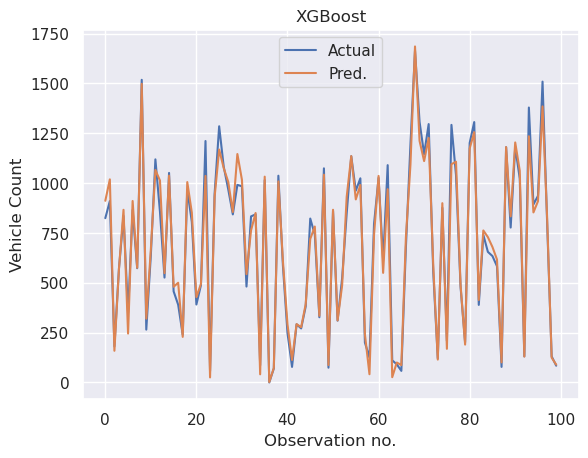

In [8]:
ml_help.plot_prediction(y_test, y_pred, "XGBoost", "Vehicle Count", "135_xgboost_predictions")

## Random Forest

### Run CV

In [9]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("133_random_forest")

In [10]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params,n_jobs=-1))

random_forest_cv_metrics = ml_help.run_stratified_kfold("Random Forest",random_forest_pipeline,X_train,y_train)
random_forest_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 7.733723878860474 seconds to fit!
Running fold 1...
Fold 1 took 7.925337553024292 seconds to fit!
Running fold 2...
Fold 2 took 8.044952869415283 seconds to fit!
Running fold 3...
Fold 3 took 7.733816146850586 seconds to fit!
Running fold 4...
Fold 4 took 7.521892547607422 seconds to fit!
Running fold 5...
Fold 5 took 7.6981728076934814 seconds to fit!
Running fold 6...
Fold 6 took 7.574755668640137 seconds to fit!
Running fold 7...
Fold 7 took 7.438481569290161 seconds to fit!
Running fold 8...
Fold 8 took 7.52664589881897 seconds to fit!
Running fold 9...
Fold 9 took 7.508498430252075 seconds to fit!


{'model': 'Random Forest',
 'r2': 0.8458132781330823,
 'mae': 112.50434324586244,
 'mape': 4684968388676615.0,
 'mse': 23769.756535976885,
 'rmse': 154.1705346329203,
 'time_to_fit': 7.670627737045288}

### Test using previously unseen data

In [11]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

start = time()
pipe = random_forest_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

random_forest_metrics = ml_help.get_metrics_reg("Random Forest",y_test,y_pred)
random_forest_metrics["time_to_fit"] = end-start
random_forest_metrics

{'model': 'Random Forest',
 'r2': 0.8472469093909294,
 'mae': 111.83989514685335,
 'mse': 23701.602336092717,
 'rmse': 153.95324724114369,
 'mape': 5106507818502911.0,
 'time_to_fit': 49.842108488082886}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


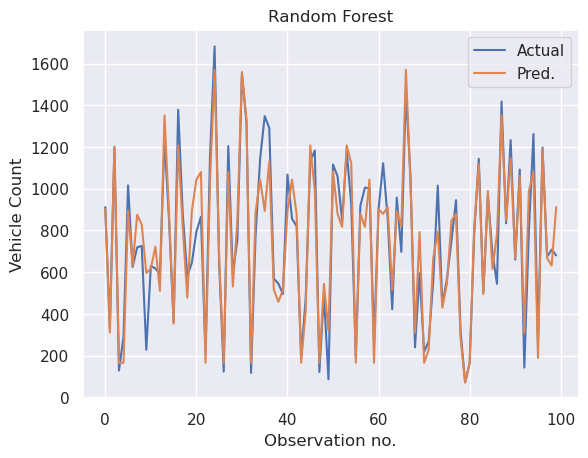

In [12]:
ml_help.plot_prediction(y_test, y_pred, "Random Forest", "Vehicle Count", "135_random_forest_predictions")

## Decision Tree

### Run CV

In [13]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("133_decision_tree")

In [14]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

dtr_cv_metrics = ml_help.run_stratified_kfold("Decision Tree",decision_tree_pipeline,X_train,y_train)
dtr_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 0.7011895179748535 seconds to fit!
Running fold 1...
Fold 1 took 0.661785364151001 seconds to fit!
Running fold 2...
Fold 2 took 0.6436705589294434 seconds to fit!
Running fold 3...
Fold 3 took 0.6420059204101562 seconds to fit!
Running fold 4...
Fold 4 took 0.7065145969390869 seconds to fit!
Running fold 5...
Fold 5 took 0.7118971347808838 seconds to fit!
Running fold 6...
Fold 6 took 0.6931931972503662 seconds to fit!
Running fold 7...
Fold 7 took 0.717416524887085 seconds to fit!
Running fold 8...
Fold 8 took 0.6993827819824219 seconds to fit!
Running fold 9...
Fold 9 took 0.6770632266998291 seconds to fit!


{'model': 'Decision Tree',
 'r2': 0.8398470926433136,
 'mae': 114.11179347605056,
 'mape': 4773555526169390.0,
 'mse': 24689.59153626445,
 'rmse': 157.1257438468292,
 'time_to_fit': 0.6854118824005127}

### Test using previously unseen data

In [15]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

start = time()
pipe = decision_tree_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

dtr_metrics = ml_help.get_metrics_reg("Decision Tree",y_test,y_pred)
dtr_metrics["time_to_fit"] = end-start
dtr_metrics

{'model': 'Decision Tree',
 'r2': 0.8424799171442036,
 'mae': 113.2462313525414,
 'mse': 24441.262359471813,
 'rmse': 156.33701532097834,
 'mape': 5196544509411436.0,
 'time_to_fit': 0.7459900379180908}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


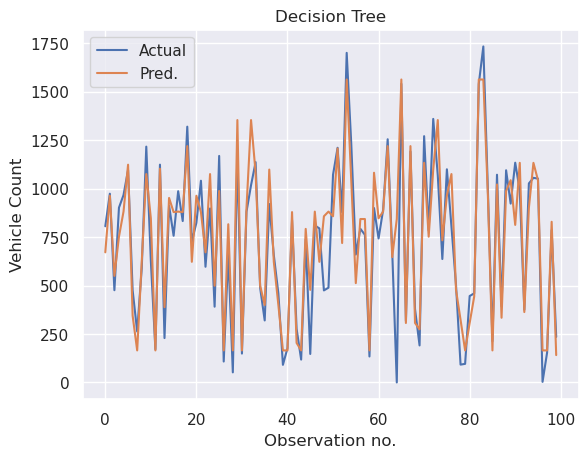

In [16]:
ml_help.plot_prediction(y_test, y_pred, "Decision Tree", "Vehicle Count", "135_decision_tree_predictions")

## MLP

### Run CV

In [17]:
from sklearn.neural_network import MLPRegressor

params = ml_help.params_to_dict("133_mlpr")

In [18]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

mlp_cv_metrics = ml_help.run_stratified_kfold("MLP",mlp_pipeline,X_train,y_train)
mlp_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 985.7682905197144 seconds to fit!
Running fold 1...
Fold 1 took 435.0191192626953 seconds to fit!
Running fold 2...
Fold 2 took 525.098925113678 seconds to fit!
Running fold 3...
Fold 3 took 268.9595763683319 seconds to fit!
Running fold 4...
Fold 4 took 540.3155827522278 seconds to fit!
Running fold 5...
Fold 5 took 441.3942856788635 seconds to fit!
Running fold 6...
Fold 6 took 486.03779554367065 seconds to fit!
Running fold 7...
Fold 7 took 435.5569713115692 seconds to fit!
Running fold 8...
Fold 8 took 522.8297369480133 seconds to fit!
Running fold 9...
Fold 9 took 463.33027243614197 seconds to fit!


{'model': 'MLP',
 'r2': 0.9340162328787827,
 'mae': 68.99459714465732,
 'mape': 3233481617369249.0,
 'mse': 10172.013250869344,
 'rmse': 100.8222736962148,
 'time_to_fit': 510.4310555934906}

### Test using previously unseen data

In [19]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

start = time()
pipe = mlp_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

mlp_metrics = ml_help.get_metrics_reg("MLP",y_test,y_pred)
mlp_metrics["time_to_fit"] = end-start
mlp_metrics

{'model': 'MLP',
 'r2': 0.9395491181629926,
 'mae': 66.66207700838692,
 'mse': 9379.730102048758,
 'rmse': 96.84900671689286,
 'mape': 3297527343022286.5,
 'time_to_fit': 615.3242778778076}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


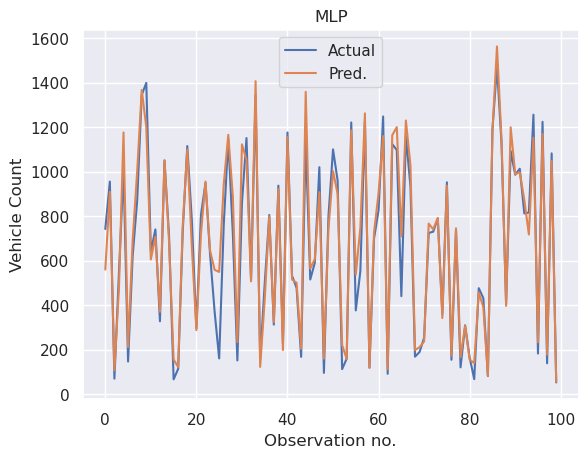

In [20]:
ml_help.plot_prediction(y_test, y_pred, "MLP", "Vehicle Count", "135_mlp_predictions")

# Store metrics

In [21]:
metrics_cv = pd.concat([pd.DataFrame(xgb_cv_metrics,index=[0]),pd.DataFrame(random_forest_cv_metrics,index=[0]),pd.DataFrame(dtr_cv_metrics,index=[0]),pd.DataFrame(mlp_cv_metrics,index=[0])])
metrics_cv.to_csv("./metrics/135_gardiner_count_weather_incidents_cv_metrics.csv.zip",index=False,compression="zip")

metrics = pd.concat([pd.DataFrame(xgb_metrics,index=[0]),pd.DataFrame(random_forest_metrics,index=[0]),pd.DataFrame(dtr_metrics,index=[0]),pd.DataFrame(mlp_metrics,index=[0])])
metrics.to_csv("./metrics/135_gardiner_count_weather_incidents_metrics.csv.zip",index=False,compression="zip")

# Print CV metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


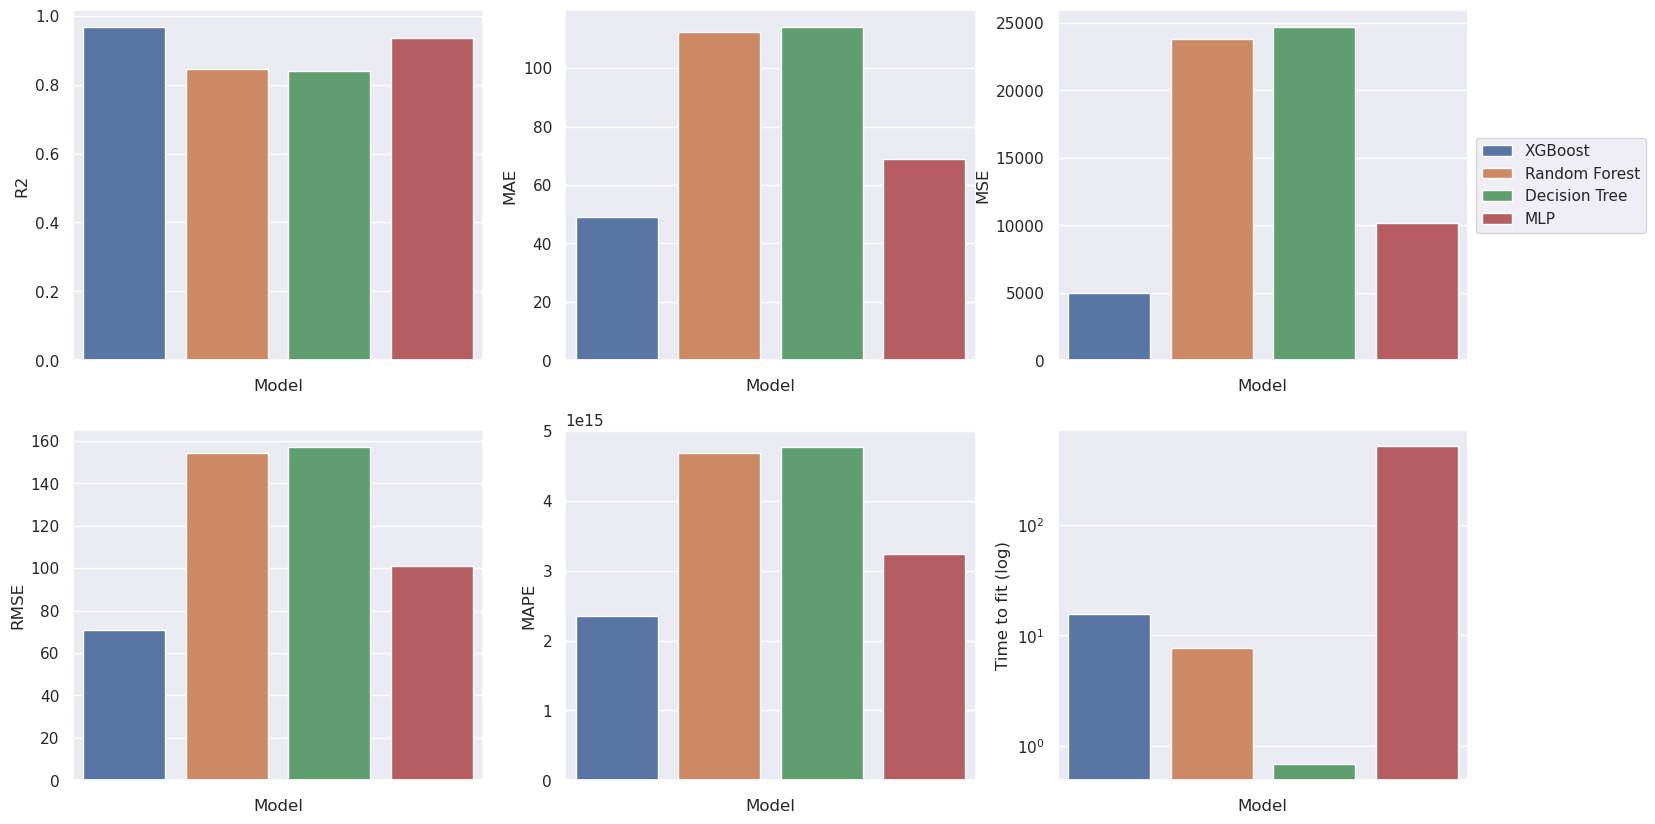

In [22]:
sns.set_theme()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics_cv, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics_cv, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics_cv, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics_cv, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics_cv, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/135_gardiner_count_weather_incidents_cv_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/135_gardiner_count_weather_incidents_cv_metrics.png",bbox_inches="tight")

# Print metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


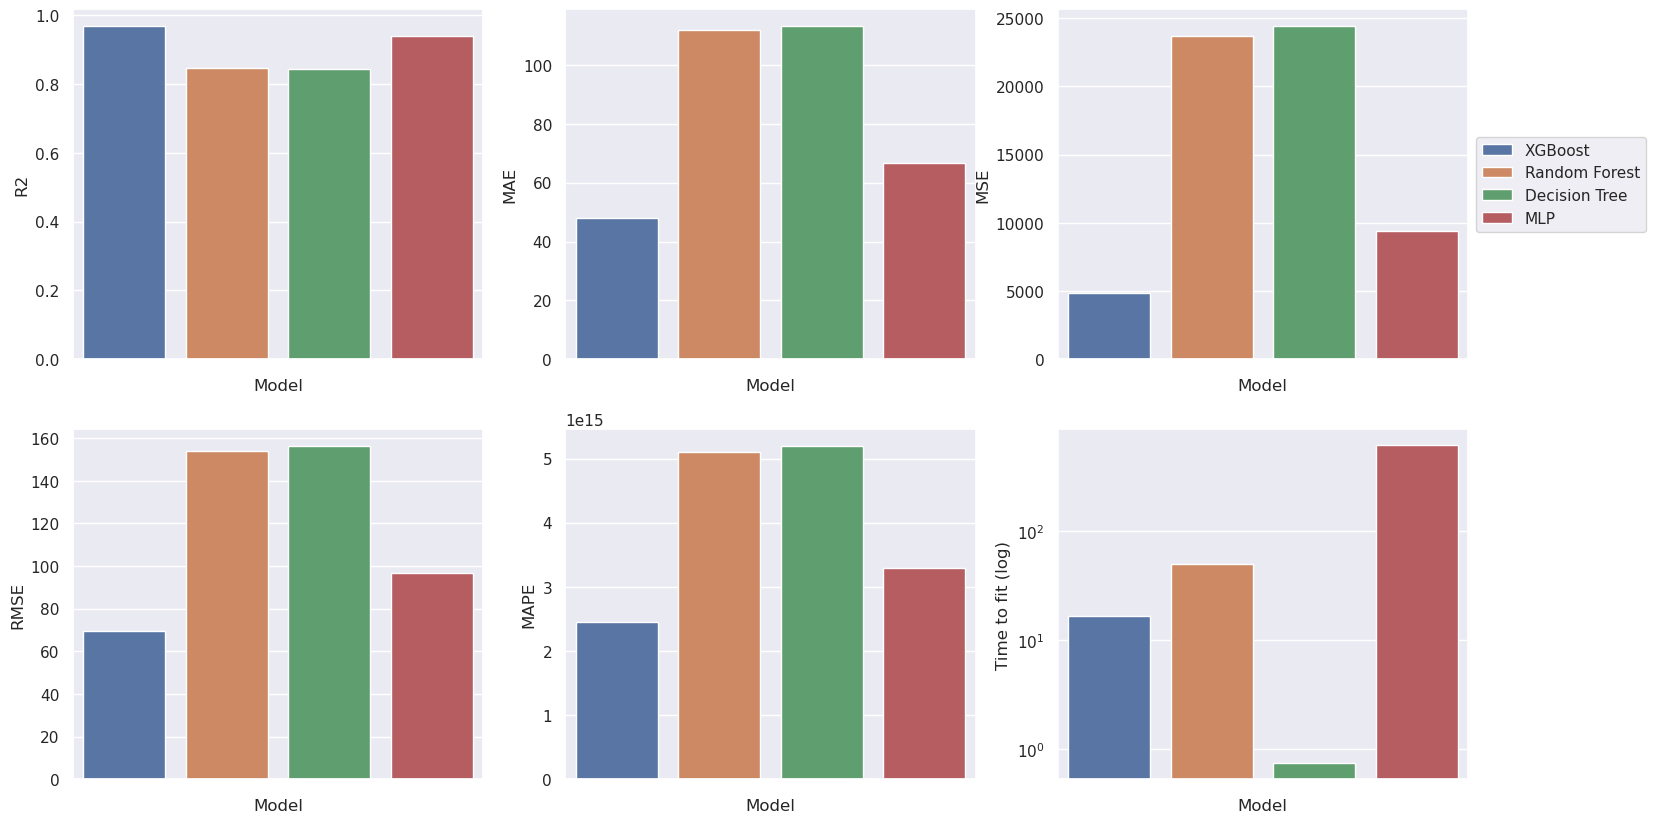

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/135_gardiner_count_weather_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/135_gardiner_count_weather_incidents_metrics.png",bbox_inches="tight")